In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sales = pd.read_csv("SalesData.csv")
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0000,4.0000,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0000,7.0000,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0000,3.0000,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0000,6.0000,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0000,0.0000,1.02,1.53
5,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Jul,0.00,10525.24,0.0000,4.0000,1.03,1.45
6,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Feb,2631.31,42812.62,1.0000,17.0000,1.08,0.99
7,2404,Account5,East,EMPIRE,BRIDGEPORT,CT,Low,Mar,4153.89,3918.77,1.0000,1.0000,0.79,1.46
8,2406,Account6,East,BIG APPLE,JERSEY CITY,NJ,Med,Mar,0.00,6951.86,0.0000,2.0000,1.12,1.02
9,2408,Account7,East,BIG APPLE,JERSEY CITY,NJ,High,Aug,0.00,10994.54,0.0000,4.0000,1.11,1.54


### 1. Compare Sales by region for 2016 with 2015 using bar chart

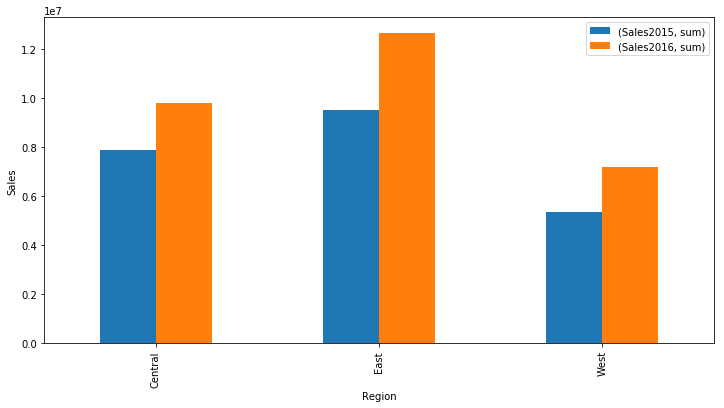

In [15]:
sales1 = sales.groupby(['Region']).aggregate({'Sales2015':['sum'],'Sales2016':['sum']})

sales1graph=sales1.plot.bar(figsize=(12,6))
plt.ylabel('Sales')
plt.legend()
plt.show()

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

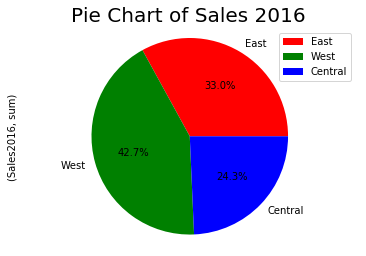

In [34]:
sales2 = sales.groupby(['Region']).aggregate({'Sales2016':['sum']})

sales2.plot(kind='pie', 
            labels=['East','West','Central'], 
            colors=['r', 'g', 'b'],
            autopct='%.1f%%', # to get percentage and round off appropriately
            fontsize=10, 
            subplots='true')

plt.title('Pie Chart of Sales 2016',fontsize=20)
plt.axis('equal')
plt.show()

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

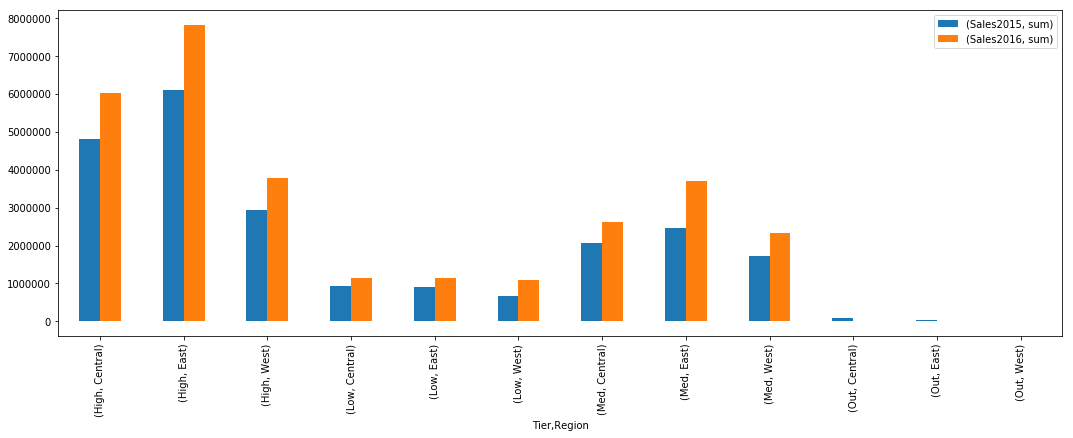

In [54]:
sales3 = sales.groupby(['Tier','Region']).aggregate({'Sales2015':['sum'],'Sales2016':['sum']})

sales3graph=sales3.plot.bar(figsize=(18,6))
plt.legend()
plt.show()

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

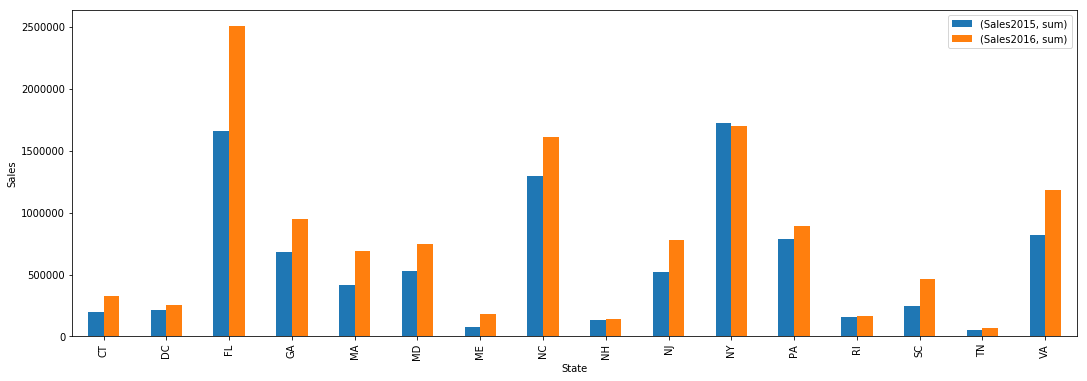

In [43]:
s = sales.loc[(sales.Region == 'East')]
sales4 = s.groupby(['State']).aggregate({'Sales2015':['sum'],'Sales2016':['sum']})

sales4graph=sales4.plot.bar(figsize=(18,6))
plt.legend()
plt.ylabel('Sales')
plt.show()

### In East region, NY registered a decline in sales in 2016

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

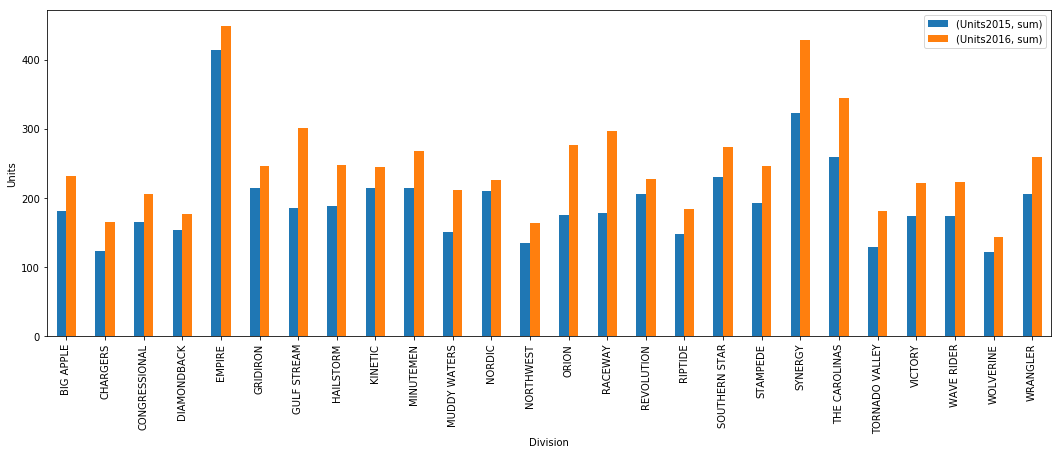

In [51]:
s1 = sales.loc[(sales.Tier == 'High')]
sales4 = s1.groupby(['Division']).aggregate({'Units2015':['sum'],'Units2016':['sum']})

sales4graph=sales4.plot.bar(figsize=(18,6))
plt.legend()
plt.ylabel('Units')
plt.show()

### No division saw a decline in number of units sold in 2016 compared to 2015.

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### •	Jan - Mar : Q1

### •	Apr - Jun : Q2

### •	Jul - Sep : Q3

### •	Oct - Dec : Q4   


In [49]:
#Categorizing
sales.loc[(sales.Month == 'Jan') | (sales.Month == 'Feb') | (sales.Month == 'Mar'),'Qtr'] = 'Q1'
sales.loc[(sales.Month == 'Apr') | (sales.Month == 'May') | (sales.Month == 'Jun'),'Qtr'] = 'Q2'
sales.loc[(sales.Month == 'Jul') | (sales.Month == 'Aug') | (sales.Month == 'Sep'),'Qtr'] = 'Q3'
sales.loc[(sales.Month == 'Oct') | (sales.Month == 'Nov') | (sales.Month == 'Dec'),'Qtr'] = 'Q4'
# New column has been added to the sales data - 'Qtr'
sales

Year,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0000,4.0000,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0000,7.0000,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0000,3.0000,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0000,6.0000,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0000,0.0000,1.02,1.53,Q3
5,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Jul,0.00,10525.24,0.0000,4.0000,1.03,1.45,Q3
6,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Feb,2631.31,42812.62,1.0000,17.0000,1.08,0.99,Q1
7,2404,Account5,East,EMPIRE,BRIDGEPORT,CT,Low,Mar,4153.89,3918.77,1.0000,1.0000,0.79,1.46,Q1
8,2406,Account6,East,BIG APPLE,JERSEY CITY,NJ,Med,Mar,0.00,6951.86,0.0000,2.0000,1.12,1.02,Q1
9,2408,Account7,East,BIG APPLE,JERSEY CITY,NJ,High,Aug,0.00,10994.54,0.0000,4.0000,1.11,1.54,Q3


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


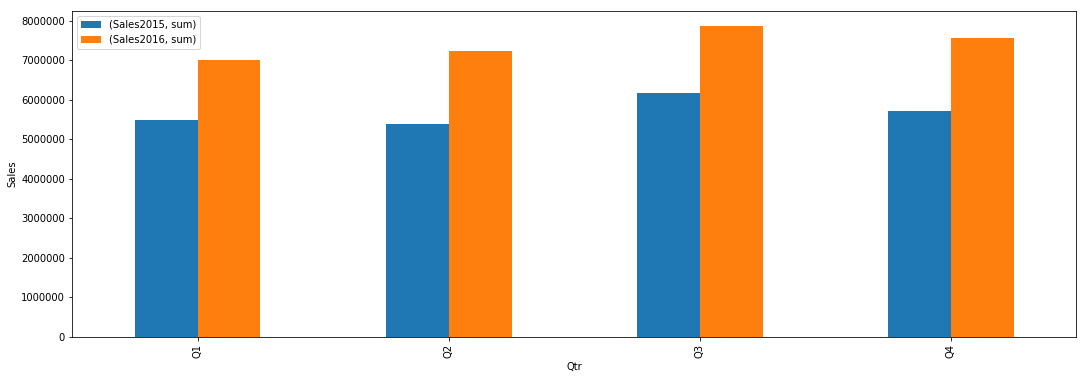

In [50]:
sales5 = sales.groupby(['Qtr']).aggregate({'Sales2015':['sum'],'Sales2016':['sum']})

sales5graph=sales5.plot.bar(figsize=(18,6))
plt.legend()
plt.ylabel('Sales')
plt.show()

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.